# Extracting Information from Audio Signals 
##  Inner Product of Sinusoids of the Same Frequency, Phase  (Session 1.9) - Kadenze 
### George Tzanetakis, University of Victoria 

In this notebook we will define the inner product of two signals and explore the influence of phase to the inner-product of two sinusoids of the same frequency. As in the previous notebook we define a function for generating the samples of a sinusoid with a specified frequency, amplitude, and phase.

In [1]:
%matplotlib notebook 
import matplotlib.pyplot as plt
import numpy as np

# generate a discrete time sine signal with a specified amplitude, frequency, duration, and phase 
def sinusoid(freq=440.0, dur=1.0, srate=44100.0, amp=1.0, phase = 0.0): 
    t = np.linspace(0,dur,int(srate*dur))
    data = amp * np.sin(2*np.pi*freq *t+phase)
    return data

The inner product of two signals is defined as the sum of their point-wise product. The point-wise product is also a signal so we can plot it. In the next cell, we look at the point-wise product of two sinusoidal signals of the same frequency and phase, as well as of the same frequency but different phase. Observe the relationship between the amplitude of data2 and the amplitude of the point-wise product. 

<IPython.core.display.Javascript object>


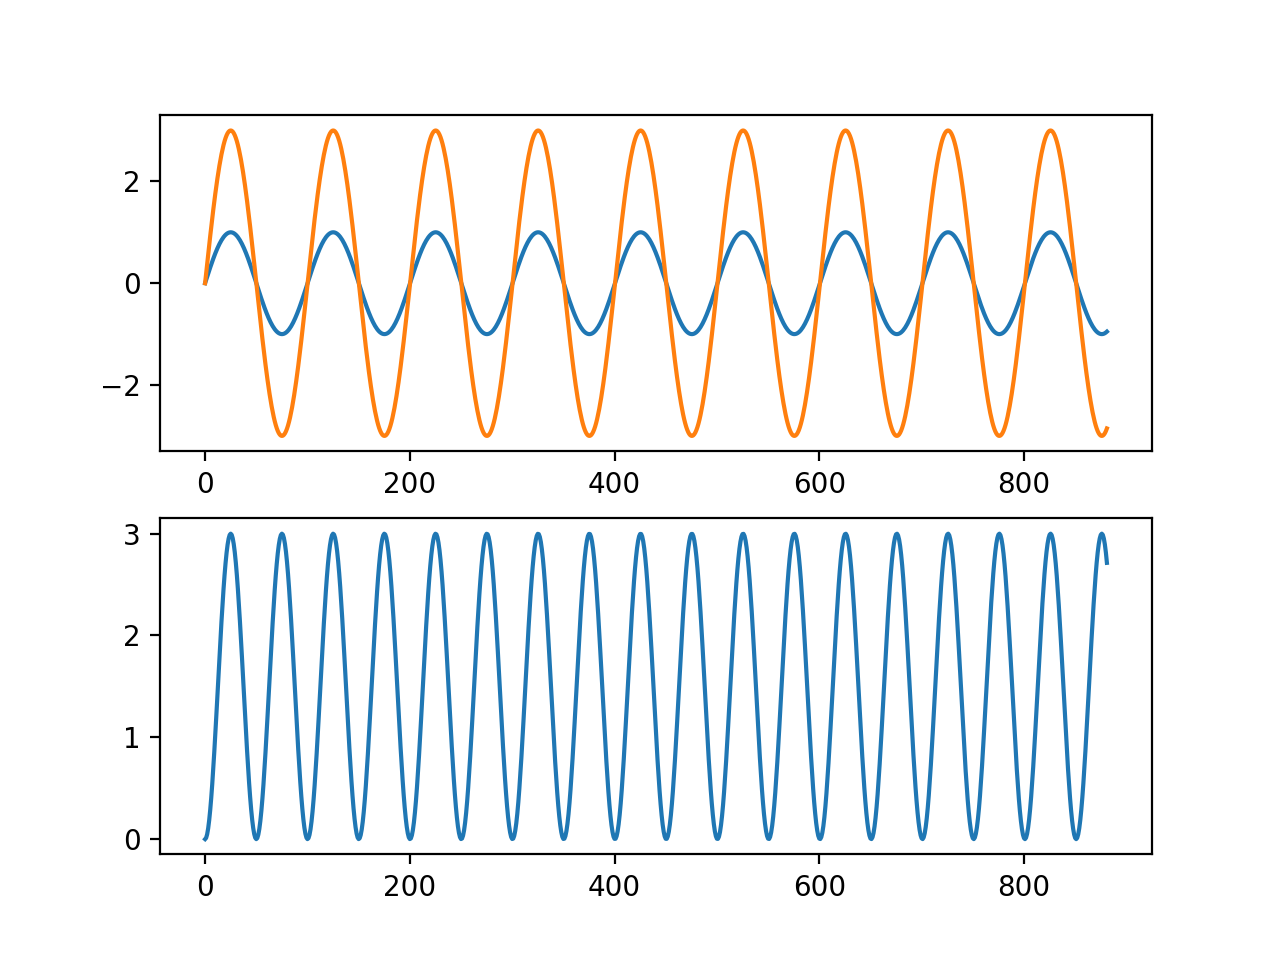

<IPython.core.display.Javascript object>


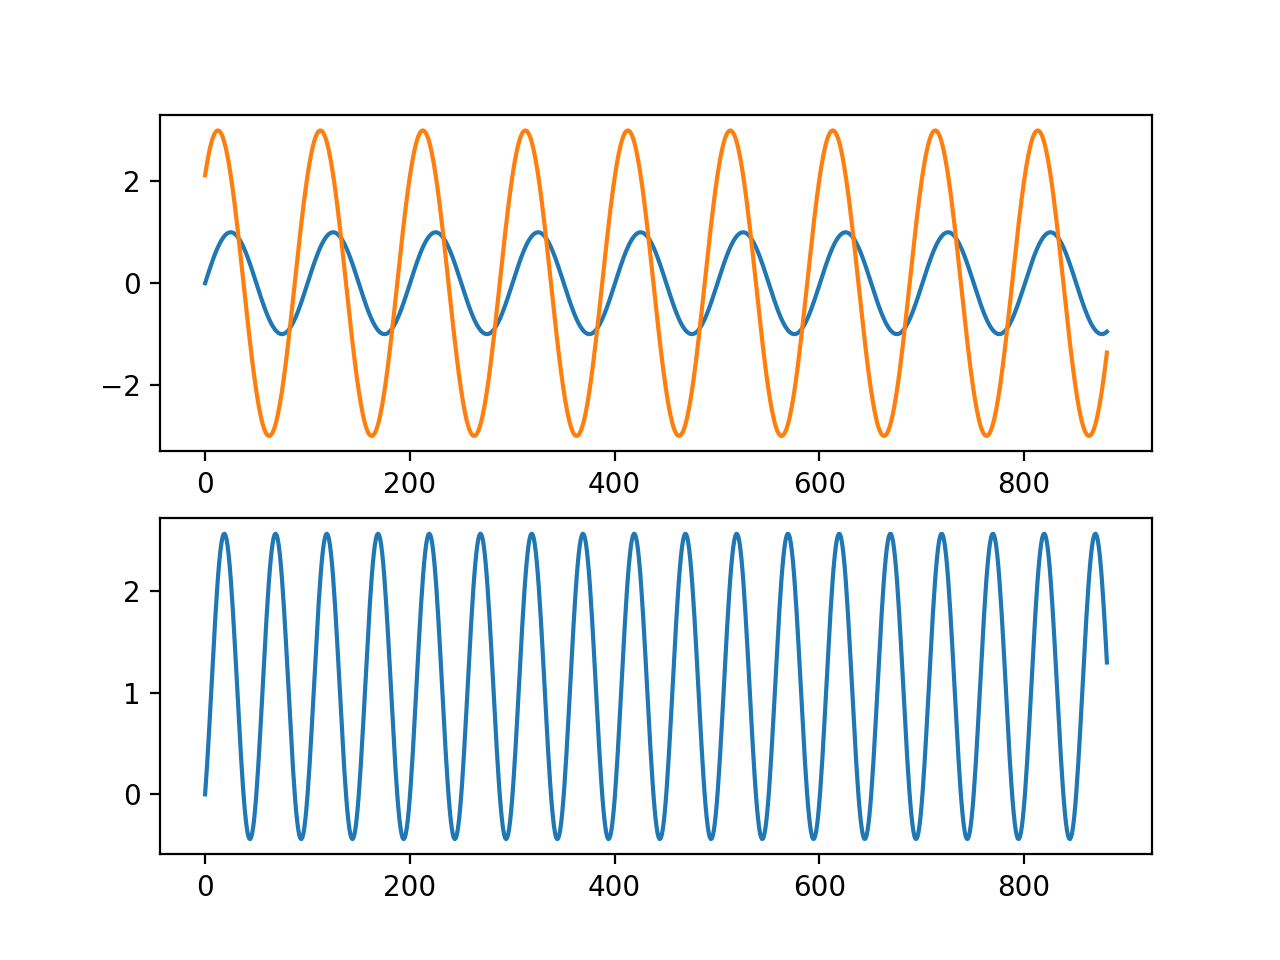

<IPython.core.display.Javascript object>


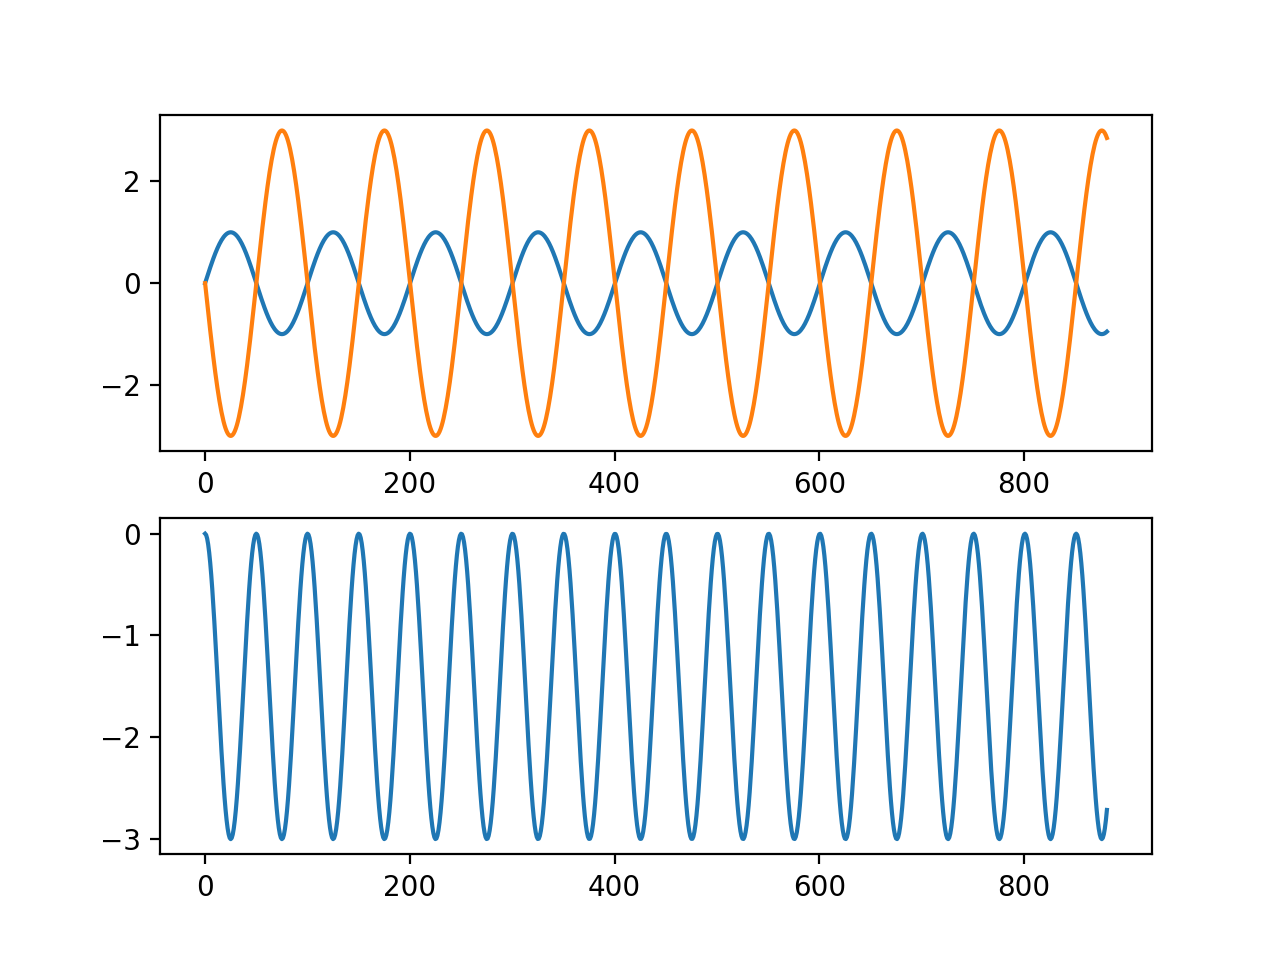

In [2]:
k = 0
srate = 8000 
data1 = sinusoid(440, 0.02, phase=0)
data2 = sinusoid(440, 0.02, amp = 3.0, phase = k * (2 * np.pi / srate))

def product_plot(data1, data2): 
    mdata = np.multiply(data1,data2)
    plt.figure()
    plt.subplot(211)
    plt.plot(data1)
    plt.plot(data2)
    plt.subplot(212)
    plt.plot(mdata)
    
    
for k in [0, 1000, 4000]: 
    data2 = sinusoid(440, 0.02,amp = 3.0, phase = k * (2 * np.pi / srate))
    product_plot(data1, data2)


Now let's look at the inner product which is a singe value corresponding to the sum of samples in the point-wise product of the two signals. The corresponding equation is: 
\begin{equation}
<x,y> = \sum_{n=0}^{N-1} x[n] y[n]
\end{equation}
In the next cell you can observe that if one of the sinusoids has unit amplitude the inner product changes based on the amplitude of the second signal. 

In [3]:
srate = 8000
k = 0 
data1 = sinusoid(440, 0.02, phase=0)
data2 = sinusoid(440, 0.02,amp = 4.0, phase = k * (2 * np.pi / srate))
mdata = np.multiply(data1,data2)
print(np.sum(mdata))
data2 = sinusoid(440, 0.02,amp = 8.0, phase = k * (2 * np.pi / srate))
mdata = np.multiply(data1,data2)
print(np.sum(mdata))

1773.1622405899482
3546.3244811798963


It is straightforward to show that an amplitude estimate of the second sinusoidal signal can be calculated by the following formula, where $N$ is the number of elements in the discrete signals and the notation $<x,y>$ for the dot product of $x$ and $y$. 
$$ A = 2 \frac{<s_1,s_2>}{N} $$ 

In [4]:
print('Amplitude estimate = %2.2f' % (2.0*np.sum(mdata)/len(mdata)))

Amplitude estimate = 8.04


We can abstract this method of amplitude estimation with a function. To check things let's generate sinudoids with a frequency of 550 Hz instead of 440. 

In [5]:
def amplitude_estimate(data1, data2): 
    mdata = np.multiply(data1,data2)
    return (2 * np.sum(mdata)/len(mdata))

data1 = sinusoid(550, 0.02, phase=0)
data2 = sinusoid(550, 0.02, amp = 26.2, phase = k * (2 * np.pi / srate))

print('Amplitude estimate = %2.2f' % amplitude_estimate(data1, data2))

Amplitude estimate = 26.17


Using the above function for amplitude estimation we can investigate what happens when you estimate amplitudes of sinusoids with different phases and amplitudes but known frequency. The idea is to try a kind of brute force approach. We will compute shift the unit amplitude basis sinusoid we use for amplitude estimation for all possible phases and plot the corresponding amplitude estimates. As you can see the highest amplitude estimate is for the sinusoids with the phase matching the unit amplitude sinusoidal signal. This is a valid but not very efficient way of computing both the amplitude and the phase of a sinusoidal signal for which we know the frequency. 

<IPython.core.display.Javascript object>


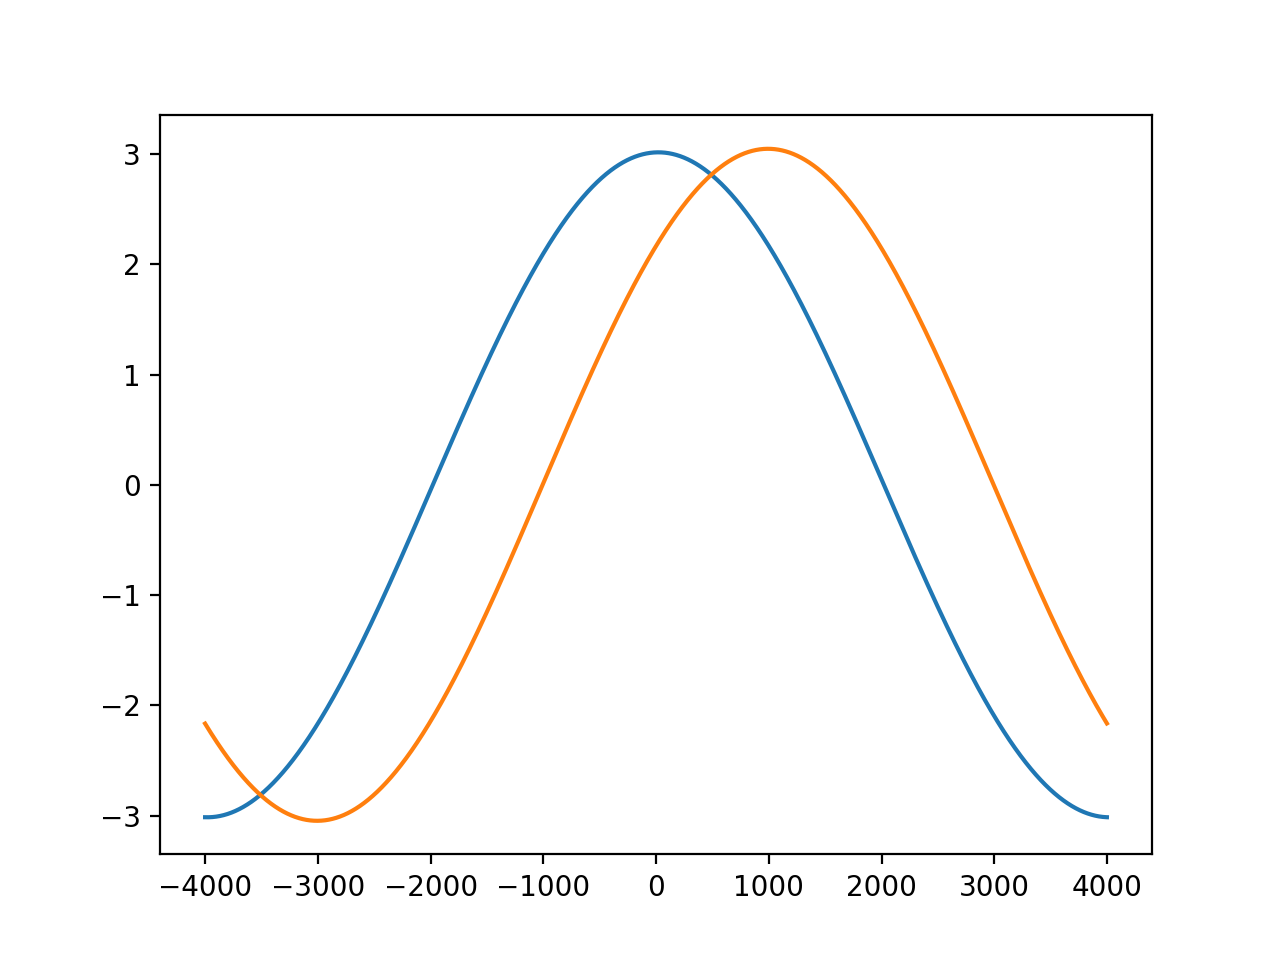

In [6]:

def plot_amp_phases(data1, srate):
    amplitude_estimates = np.zeros(srate)
    phases = range(-int(srate/2), int(srate/2))
    for k in phases: 
        data2 = sinusoid(440, 0.02,amp = 1.0, phase = k * (2 * np.pi / srate))
        amplitude_estimates[k+int(srate/2)] = amplitude_estimate(data1,data2)
    plt.plot(phases, amplitude_estimates)

srate = 8000 
plt.figure()
k = 0  
data1 = sinusoid(440, 0.02,amp = 3.0, phase = k * (2 * np.pi / srate))
plot_amp_phases(data1, srate)
k = 1000 
data1 = sinusoid(440, 0.02,amp = 3.0, phase = k * (2 * np.pi / srate))
plot_amp_phases(data1, srate)


To summarize, we can estimate the amplitude of a sinusoidal signal if we know its frequency and phase by taking the inner product with a unit amplitude sinusoidal signal with the same frequency and phase. We can also estimate the phase if all we know is the frequency by forming multiple inner-product with different phases and selecting the one that gives the highest amplitude estimate. 

Later, we will see how this approach can be used to reliably estimate the amplitude and phases of sinusoidal signals in the presence of interferring noise and other sinusoids. Understanding how inner products of sinusoidal signals work is fundamental in understanding how Discrete Fourier Transform works, which is arguably the most important algorithm in Digital Signal Processing. 